In [1]:
import gensim
import umap
import altair
import pandas as pd


import matplotlib.pyplot as plt

In [2]:
%cd ..

/home/kuba/Projects/github_search


In [44]:
word_vectors_filename = 'data/import2vec_module_vectors_adam_dim50_bs128.txt'
import2vec = gensim.models.KeyedVectors.load_word2vec_format(word_vectors_filename)

In [45]:
vectors = import2vec.syn0

/etc/conda/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [46]:
import2vec.most_similar('numpy')

[('scipy', 0.9586639404296875),
 ('matplotlib', 0.9476054310798645),
 ('odl', 0.9025446772575378),
 ('random', 0.896704375743866),
 ('sklearn', 0.8946490287780762),
 ('object_detection', 0.8924439549446106),
 ('pickle', 0.8865970969200134),
 ('official', 0.8857666254043579),
 ('pil', 0.8855882287025452),
 ('time', 0.8804594278335571)]

In [47]:
import2vec.most_similar('tensorflow')

[('absl', 0.934059739112854),
 ('six', 0.9205443263053894),
 ('nets', 0.9198452830314636),
 ('tensorflow_probability', 0.9196375608444214),
 ('official', 0.9158141016960144),
 ('delf', 0.9157949686050415),
 ('tf_slim', 0.9147989153862),
 ('tensor2tensor', 0.9067897200584412),
 ('object_detection', 0.9050683379173279),
 ('deeplab', 0.903596043586731)]

In [48]:
import2vec.most_similar('keras')

[('matplotlib', 0.8760300278663635),
 ('time', 0.86622554063797),
 ('scipy', 0.8625369668006897),
 ('random', 0.8585975170135498),
 ('glob', 0.8575751185417175),
 ('argparse', 0.8559621572494507),
 ('pickle', 0.8556525111198425),
 ('os', 0.8526175022125244),
 ('pil', 0.8525245785713196),
 ('cv2', 0.8447656631469727)]

In [49]:
import2vec.most_similar('sklearn')

[('matplotlib', 0.913463294506073),
 ('numpy', 0.8946489691734314),
 ('scipy', 0.8922533988952637),
 ('pandas', 0.8800762891769409),
 ('pickle', 0.8421314358711243),
 ('random', 0.8359624147415161),
 ('gym', 0.8317903280258179),
 ('caffe', 0.8271812796592712),
 ('detectron', 0.8218886256217957),
 ('itertools', 0.8215101957321167)]

In [50]:
umapper = umap.UMAP(n_neighbors=20, metric='cosine')

In [51]:
umap_vectors = umapper.fit_transform(vectors)

In [52]:
umap_vectors

array([[-2.825261 , 10.549618 ],
       [-4.6502137,  8.964371 ],
       [-2.8221352,  7.240755 ],
       ...,
       [-5.153249 ,  7.91036  ],
       [-1.9758574,  7.4943776],
       [-3.9002016,  8.004948 ]], dtype=float32)

In [53]:
viz_df = pd.DataFrame(umap_vectors)
viz_df.columns = ['x', 'y']
viz_df['name'] = import2vec.vocab.keys()

In [54]:
reference_modules = [
    'numpy',
    'tensorflow',
    'keras',
    'sklearn',
    'scipy',
    'matplotlib',
    'torch',
    'os',
    'sys',
    'seaborn'
]

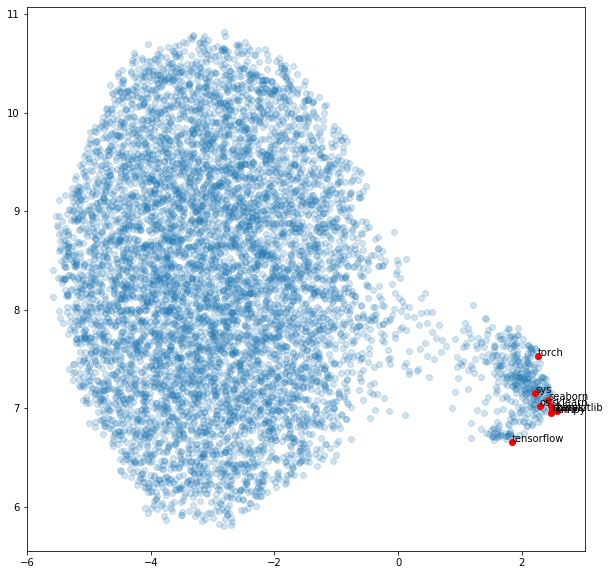

In [55]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(viz_df['x'], viz_df['y'], alpha=0.2)

for module_name in reference_modules:
    module_row = viz_df[viz_df['name'] == module_name].iloc[0]
    ax.scatter([module_row['x']], [module_row['y']], c='red')
    ax.annotate(module_name, (module_row['x'], module_row['y']))

In [56]:
altair_scatterplot = (
        altair.Chart(viz_df.sample(5000))
            .mark_circle(size=100, color='red', opacity=0.1)
            .encode(x='x', y='y', tooltip=['name'])
            .interactive()
    )

reference_scatterplot = (
        altair.Chart(viz_df[viz_df['name'].isin(reference_modules)])
            .mark_circle(size=100, color='blue', opacity=1.0)
            .encode(x='x', y='y', tooltip=['name'])
            .interactive()
    )

altair_scatterplot + reference_scatterplot

alt.LayerChart(...)